# Estadísticas básicas del lenguaje

## Configuración inicial

En este notebook vamos a descargar el dataset book que contiene muchos libros en inglés en formato de texto tokenizado, de los cuales vamos a hacer procesamiento

In [0]:
import nltk
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np

# Analizando un texto

In [0]:
texts()

text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [0]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [0]:
text1.tokens[:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [0]:
print(len(text1))

260819


## Medida de riqueza léxica de un texto

$$ R_l =  \frac{\text{total de palabras únicas}}{\text{total de palabras}} = \frac{\text{longitud del vocabulario}}{\text{longitud del texto}} \\  $$

**NOTA**

Para usar Latex en Colab o Jupyter éste recurso es muy importante a tener encuenta
[Learn How to Write Markdown & LaTeX in The Jupyter Notebook](https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd)

In [0]:
# La función 'set' en python busca los tokens repetidos y los deja una sola vez. Esta funcion devuelve un diccionario
# Usamos sorted para ordenar alfabeticamente los datos y que los devuelva en una lista
vocabulario = sorted(set(text1))  
print(vocabulario[1000:1010])

['Crew', 'Crish', 'Crockett', 'Cross', 'Crossed', 'Crossing', 'Crotch', 'Crowding', 'Crown', 'Crozetts']


In [0]:
# Riqueza léxica
rl = len(vocabulario)/len(text1)
print(rl)

0.07406285585022564


In [0]:
# Funcion que calcula la riqueza lexica de un libro
def riqueza_lexica(texto):
  vocabulario = sorted(set(texto))  
  return len(vocabulario)/len(texto)

riqueza_lexica(text1)

0.07406285585022564

In [0]:
def porcentaje_palabra(palabra, texto):
  return 100*texto.count(palabra)/len(texto)

In [0]:
porcentaje_palabra('monster', text1)

0.018786974875296663

In [0]:
text1.count('monster')

49

# Estadística del Lenguaje

Los cálculos estadísticos más simples que se pueden efectuar sobre un texto o un corpus son los relacionados con frecuencia de aparición de palabras.

- Podemos construir un diccionario en python donde las llaves sean las palabras y los valores sean las frecuencias de ocurrencia de esas palabras

- ejemplo `dic = {'monster':49, 'boat': 54, ...}`

In [0]:
dic = {}

"""
NO recomendado por ser costoso computacionalmente
for palabra in set(text1):
  dic[palabra] = text1.count(palabra)

dic"""

'\nNO recomendado por ser costoso computacionalmente\nfor palabra in set(text1):\n  dic[palabra] = text1.count(palabra)\n\ndic'

## Método de FreqDist de NLTK

In [0]:
from nltk import FreqDist
fdist = FreqDist(text1)

In [0]:
fdist.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

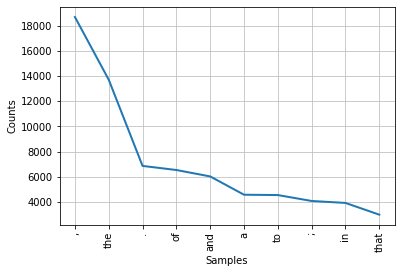

In [0]:
fdist.plot(10)

In [0]:
fdist['monster']

49

## Distribuciones sobre contenido con filtro-fino

* Como vimos en la sección anterior, los tokens más frecuentes en un texto no son necesariamente las palabras que mas informacion nos arrojan sobre el contenido del mismo. 
* Por ello, es mejor filtrar y construir distribuciones de frecuencia que no consideren signos de puntuación o caracteres especiales

In [0]:
long_words = [palabra for palabra in text1 if len(palabra) > 5]
vocabulario_filtrado = sorted(set(long_words))
vocabulario_filtrado[:10]

['ACCOUNT',
 'ADDITIONAL',
 'ADVANCING',
 'ADVENTURES',
 'AFFGHANISTAN',
 'AFRICA',
 'AGAINST',
 'ALFRED',
 'ALGERINE',
 'AMERICA']

Podemos ahora construir una lista de tuplas, basados en los conteos ya pre-calculados de la función `FreqDist`, así:

`fdist_filtrado = [('account', 2), ('additional', 32), ('advancing', 5), ...]`

Luego podemos convertir el objeto creado a formato de `np.array`de **Numpy** para poder hacer un sort por palabras mas frecuentes.

`fdist_filtrado = np.array(fdist_filtrado, *args)`

`np.sort(fdist_filtrado, *args) = [('account', 2), ('advancing', 5), ('additional', 32), ...]`

In [0]:
# Ordenando palabras en tuplas
palabras_interesantes = [(palabra, fdist[palabra]) for palabra in set(text1) if len(palabra) > 5 and fdist[palabra] > 10]

In [0]:
dtypes = [('word', 'S10'), ('frecuency', int)]
palabras_interesantes = np.array(palabras_interesantes, dtype=dtypes)

In [0]:
palabras_interesantes = np.sort(palabras_interesantes, order = 'frecuency')
palabras_interesantes[:10]

array([(b'America', 11), (b'Father', 11), (b'Fleece', 11),
       (b'Guernsey', 11), (b'Heaven', 11), (b'NANTUCKET', 11),
       (b'Perseus', 11), (b'Ramadan', 11), (b'Therefore', 11),
       (b'additional', 11)], dtype=[('word', 'S10'), ('frecuency', '<i8')])

In [0]:
# Construccion de un grafico de barras customizado con Matplotlib
# https://matplotlib.org/3.1.1/gallery/ticks_and_spines/custom_ticker1.html#sphx-glr-gallery-ticks-and-spines-custom-ticker1-py

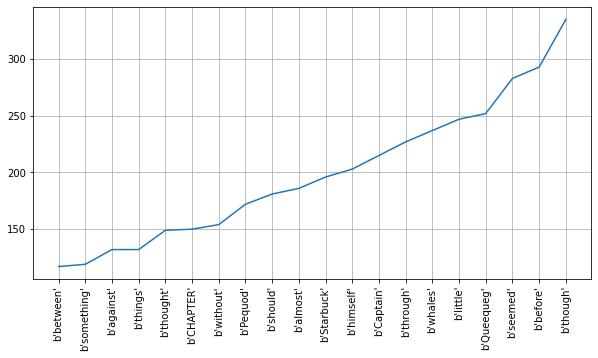

In [0]:
top_words = 20
x = np.arange(len(palabras_interesantes[-top_words:]))
y = [freq[1] for freq in palabras_interesantes[-top_words:]]
plt.figure(figsize = (10, 5))
plt.plot(x, y)
plt.xticks(x, [str(freq[0]) for freq in palabras_interesantes[-top_words:]], rotation='vertical')
plt.grid(True)
plt.show()